<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Kouchakzade

**Student ID**: 400101837



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [5]:
## Import necessary libraries here ##
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import r2_score , root_mean_squared_error , mean_squared_error

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

Input features in order:
- 1) CRIM: per capita crime rate by town
- 2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- 3) INDUS: proportion of non-retail business acres per town
- 4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- 5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
- 6) RM: average number of rooms per dwelling
- 7) AGE: proportion of owner-occupied units built prior to 1940
- 8) DIS: weighted distances to five Boston employment centres
- 9) RAD: index of accessibility to radial highways
- 10) TAX: full-value property-tax rate per $10,000
- 11) PTRATIO: pupil-teacher ratio by town
-12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
-13) LSTAT: % lower status of the population

Output variable:
- 1) MEDV: Median value of owner-occupied homes in $1000's

In [6]:
## Write your code here ##
data = pd.read_csv('/content/Boston.csv').to_numpy()
input = data[:,:13]
output = data[:,-1]
X , y = minmax_scale(input) , output.copy()
m , n = X.shape
print(f'X shape : {X.shape}, Y shape : {y.shape}')

X shape : (506, 13), Y shape : (506,)


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [7]:
## Write your code here ##

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80 , random_state = 40)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

print(f'''RMSE of Train Data : {root_mean_squared_error(y_train,y_train_predict):.4f}
RMSE of Test Data : {root_mean_squared_error(y_test,y_test_predict):.4f}
R2 for Train Data : {r2_score(y_train,y_train_predict):.4f}
R2 for Test data : {r2_score(y_test,y_test_predict):.4f}''')

equation = 'y = ' + ' + '.join([f'{coef:.2f}x{i}' for i, coef in enumerate(reg.coef_)]) + f' + {reg.intercept_:.2f}'
print(equation)

RMSE of Train Data : 4.3851
RMSE of Test Data : 5.8241
R2 for Train Data : 0.7502
R2 for Test data : 0.7010
y = -11.25x0 + 4.21x1 + -0.31x2 + 2.72x3 + -7.79x4 + 20.73x5 + -0.40x6 + -14.81x7 + 6.59x8 + -6.18x9 + -8.37x10 + 2.38x11 + -19.00x12 + 26.88


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10 ** np.linspace (3,-3,100) *0.5$$

for alpha = 0.1527 min MSE  = 33.8911
for alpha = 0.1527 max R2  = 0.7012


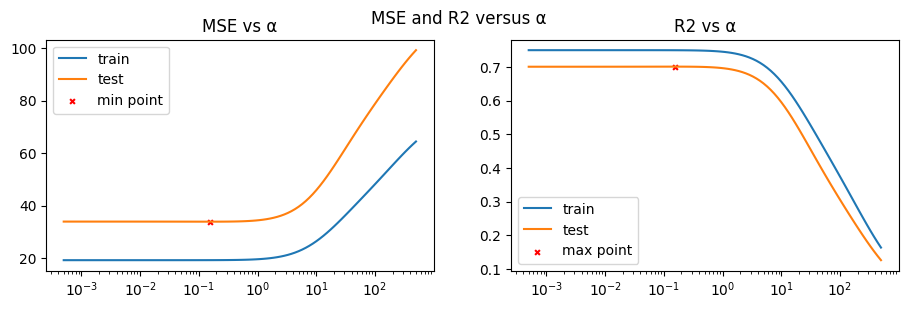

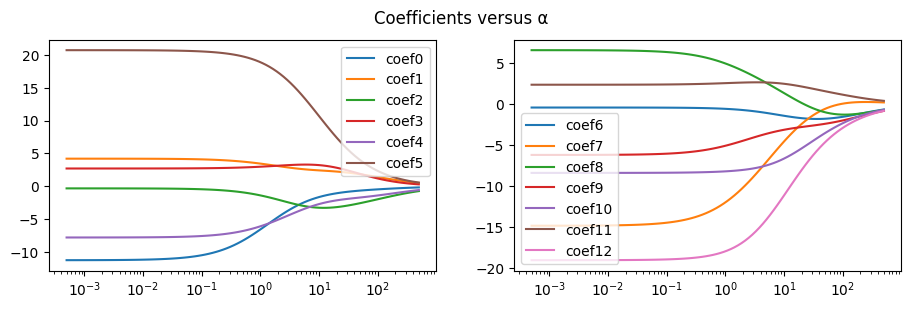

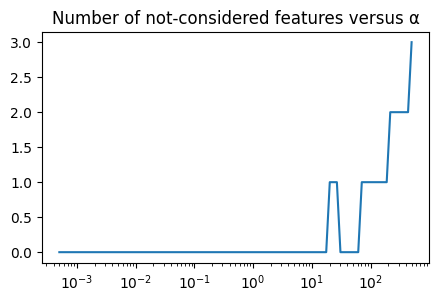

In [20]:
## Write your code here ##
alphas = 10 ** np.linspace(-3,3,100) * 0.5
RMSE_history_train , RMSE_history_test = np.array([]) , np.array([])
R2_history_train , R2_history_test = np.array([]) , np.array([])
coef_history = np.zeros((n,100))
for indx,alpha in enumerate(alphas):
    reg = Ridge(alpha)
    reg.fit(X_train,y_train)
    y_train_predict  = reg.predict(X_train)
    y_test_predict = reg.predict(X_test)
    RMSE_train , R2_train = mean_squared_error(y_train,y_train_predict) , r2_score(y_train,y_train_predict)
    RMSE_test , R2_test = mean_squared_error(y_test,y_test_predict) , r2_score(y_test,y_test_predict)
    RMSE_history_train , RMSE_history_test = np.append(RMSE_history_train,RMSE_train) , np.append(RMSE_history_test,RMSE_test)
    R2_history_train , R2_history_test = np.append(R2_history_train,R2_train) , np.append(R2_history_test,R2_test)
    coef_history[:,indx] = reg.coef_.squeeze()

def plot_semilog(X,Y1,Y2,title,i):
    plt.subplot(1,2,i)
    plt.title(f'{title} vs α')
    plt.semilogx(X,Y1,label = 'train')
    plt.semilogx(X,Y2,label = 'test')
    if i == 1 :
        print(f'for alpha = {X[np.argmin(Y2)]:.4f} min MSE  = {np.min(Y2):.4f}')
        plt.scatter(X[np.argmin(Y2)],np.min(Y2),c='r',s=12,label='min point',marker='x')
    else :
        print(f'for alpha = {X[np.argmax(Y2)]:.4f} max R2  = {np.max(Y2):.4f}')
        plt.scatter(X[np.argmax(Y2)],np.max(Y2),c='r',s=12,label='max point',marker='x')
    plt.legend()

plt.figure(figsize=(11,3))
plt.suptitle('MSE and R2 versus α')
plot_semilog(alphas,RMSE_history_train,RMSE_history_test,'MSE',1)
plot_semilog(alphas,R2_history_train,R2_history_test,'R2',2)

plt.figure(figsize=(11,3))
plt.suptitle('Coefficients versus α')
for i in range(2):
    plt.subplot(1,2,i + 1)
    for j in range(6):
        plt.semilogx(alphas,coef_history[6*i+j,:],label = f'coef{6*i+j}')
        plt.legend()
plt.semilogx(alphas,coef_history[12,:],label = f'coef{12}')
plt.legend()

def non_considered(coef_history,ratio):
    non_consider = np.zeros(100)
    for indx,column in enumerate(np.abs(coef_history.T)):
        non_consider[indx] = (np.sum(column < ratio ))
    return non_consider

plt.figure(figsize=(5,3))
plt.title('Number of not-considered features versus α')
plt.semilogx(alphas,non_considered(coef_history,0.3))
plt.show()

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

In ridge regression, we incorporate a penalty term to mitigate overfitting. Overfitting occurs when a model performs exceedingly well on the training data but fails to generalize to unseen or test datasets. By introducing the penalty term in ridge regression and plotting the Mean Squared Error (MSE) and R-squared (R2) against alphas, we determine that the optimal alpha value is 0.1527. This implies that at this alpha value, the model performs optimally on test data. Comparing ridge regression to linear regression, we observe that the R2 and MSE metrics on the test data are superior, indicating that the ridge regression model generalizes better to unseen data. Additionally, the coefficients in ridge regression are shrunk to mitigate overfitting.

In [ ]:
reg = Ridge(alpha=0.1527)
reg.fit(X_train,y_train)
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

print(f'''RMSE of Train Data : {root_mean_squared_error(y_train,y_train_predict):.4f}
RMSE of Test Data : {root_mean_squared_error(y_test,y_test_predict):.4f}
R2 for Train Data : {r2_score(y_train,y_train_predict):.4f}
R2 for Test data : {r2_score(y_test,y_test_predict):.4f}''')

equation = 'y = ' + ' + '.join([f'{coef:.2f}x{i}' for i, coef in enumerate(reg.coef_)]) + f' + {reg.intercept_:.2f}'
print(equation)

RMSE of Train Data : 4.3866
RMSE of Test Data : 5.8216
R2 for Train Data : 0.7500
R2 for Test data : 0.7012
y = -10.13x0 + 4.05x1 + -0.51x2 + 2.77x3 + -7.45x4 + 20.44x5 + -0.43x6 + -14.26x7 + 6.25x8 + -5.95x9 + -8.34x10 + 2.42x11 + -18.86x12 + 26.78


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

Lasso regression, also known as L1 regularization, is particularly useful in scenarios where feature selection or variable reduction is important. Here are some situations where Lasso regression is commonly considered:

- **High-dimensional data**: When dealing with datasets with a large number of features compared to the number of samples (high-dimensional data), Lasso regression can help in feature selection by shrinking the coefficients of irrelevant or less important features to zero. This simplifies the model and reduces the risk of overfitting.

- **Sparse feature space**: Lasso tends to produce sparse solutions, meaning it drives many coefficients to zero. This property is advantageous when the true underlying model is sparse, i.e., only a subset of features truly impacts the target variable.

- **Collinearity among features**: In datasets where there is multicollinearity (high correlation) among predictors, Lasso regression can help in selecting one feature from a group of highly correlated features, effectively choosing the most relevant ones and setting others to zero.

for alpha = 0.0005 min MSE  = 33.9220
for alpha = 0.0005 max R2  = 0.7009


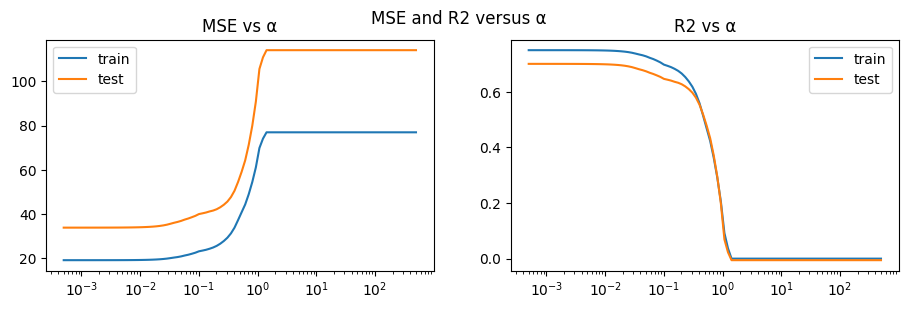

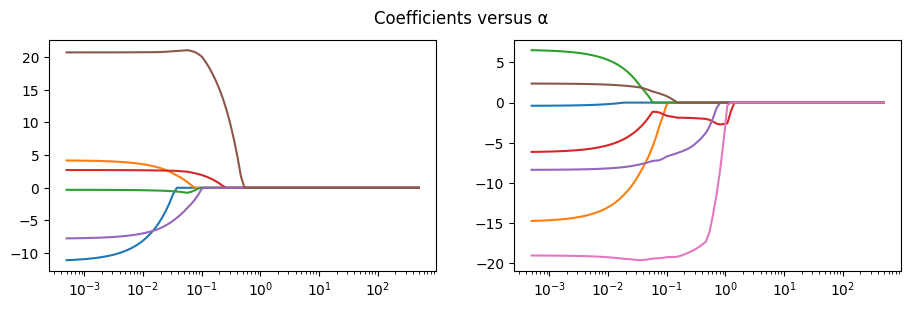

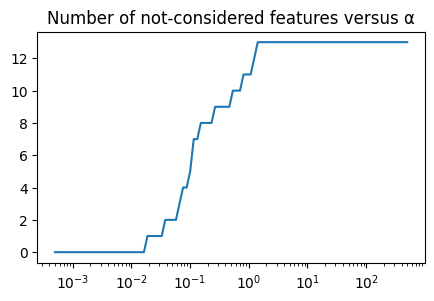

In [26]:
## Write your code here ##
num = 100
alphas = 10 ** np.linspace(-3,3,num) * 0.5
RMSE_history_train , RMSE_history_test = np.array([]) , np.array([])
R2_history_train , R2_history_test = np.array([]) , np.array([])
coef_history = np.zeros((n,num))
for indx,alpha in enumerate(alphas):
    reg = Lasso(alpha)
    reg.fit(X_train,y_train)
    y_train_predict  = reg.predict(X_train)
    y_test_predict = reg.predict(X_test)
    RMSE_train , R2_train = mean_squared_error(y_train,y_train_predict) , r2_score(y_train,y_train_predict)
    RMSE_test , R2_test = mean_squared_error(y_test,y_test_predict) , r2_score(y_test,y_test_predict)
    RMSE_history_train , RMSE_history_test = np.append(RMSE_history_train,RMSE_train) , np.append(RMSE_history_test,RMSE_test)
    R2_history_train , R2_history_test = np.append(R2_history_train,R2_train) , np.append(R2_history_test,R2_test)
    coef_history[:,indx] = reg.coef_.squeeze()

plt.figure(figsize=(11,3))
plt.suptitle('MSE and R2 versus α')
plot_semilog(alphas,RMSE_history_train,RMSE_history_test,'MSE',1)
plot_semilog(alphas,R2_history_train,R2_history_test,'R2',2)

plt.figure(figsize=(11,3))
plt.suptitle('Coefficients versus α')
for i in range(2):
    plt.subplot(1,2,i + 1)
    for j in range(6):
        plt.semilogx(alphas,coef_history[6*i+j,:],label = f'coef{6*i+j}')
plt.semilogx(alphas,coef_history[12,:],label = f'coef{12}')

plt.figure(figsize=(5,3))
plt.title('Number of not-considered features versus α')
plt.semilogx(alphas,non_considered(coef_history,0.01))
plt.show()

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

In a scenario with a low ratio of training data, the likelihood of overfitting is high, a notion supported by the plots below. When examining the metrics of R2 and RMSE against the ratio of the training dataset, it becomes evident that lower ratios result in poorer metrics, particularly noticeable in linear regression compared to Lasso and Ridge. This discrepancy arises because Ridge and Lasso incorporate penalty terms to mitigate overfitting, whereas linear regression tends to overfit on training sets. As the training dataset size increases, performance metrics improve and begin to converge across the three methods, as the risk of overfitting diminishes. Plotting selected alpha values against training ratios reveals that at lower ratios, where the risk of overfitting is high, alpha values are elevated. However, as the training ratio increases, alpha values decrease, signifying the reduced risk of overfitting associated with higher training ratios.

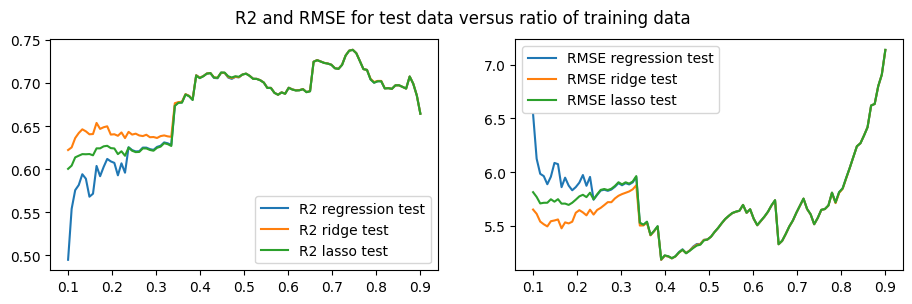

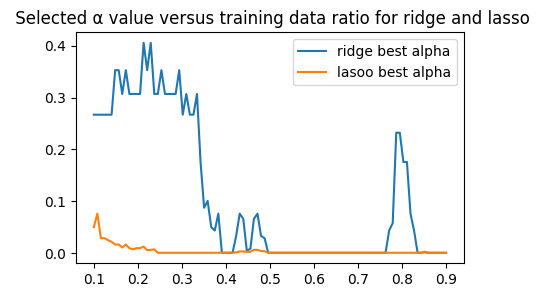

In [27]:
## Write you code here ##
num_ratio = 100
ratios = np.linspace(0.1,0.9,num_ratio)
R2_reg , MSE_reg = np.zeros(num_ratio) , np.zeros(num_ratio)
R2_ridge , MSE_ridge = np.zeros(num_ratio) , np.zeros(num_ratio)
R2_lasso , MSE_lasso = np.zeros(num_ratio) , np.zeros(num_ratio)
ridge_best_alpha , lasso_best_alpha = np.zeros(num_ratio) , np.zeros(num_ratio)
for indx,ratio in enumerate(ratios):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = ratio , random_state = 40)

    reg = LinearRegression()
    reg.fit(X_train,y_train)
    y_test_predict = reg.predict(X_test)
    MSE_reg[indx] , R2_reg[indx] =  root_mean_squared_error(y_test,y_test_predict) , r2_score(y_test,y_test_predict)

    t_R2_ridge , t_MSE_ridge = np.zeros(num) , np.zeros(num)
    t_R2_lasso , t_MSE_lasso = np.zeros(num) , np.zeros(num)
    for j,alpha in enumerate(alphas):
        ridge = Ridge(alpha)
        ridge.fit(X_train,y_train)
        y_test_predict_ridge = ridge.predict(X_test)
        t_MSE_ridge[j] , t_R2_ridge[j] =  root_mean_squared_error(y_test,y_test_predict_ridge) , r2_score(y_test,y_test_predict_ridge)

        lasso = Lasso(alpha)
        lasso.fit(X_train,y_train)
        y_test_predict_lasso = lasso.predict(X_test)
        t_MSE_lasso[j] , t_R2_lasso[j] =  root_mean_squared_error(y_test,y_test_predict_lasso) , r2_score(y_test,y_test_predict_lasso)

    ridge_best_alpha[indx] = alphas[np.argmin(t_MSE_ridge)]
    MSE_ridge[indx] , R2_ridge[indx] =  np.min(t_MSE_ridge) , np.max(t_R2_ridge)
    lasso_best_alpha[indx] = alphas[np.argmin(t_MSE_lasso)]
    MSE_lasso[indx] , R2_lasso[indx] =  np.min(t_MSE_lasso) , np.max(t_R2_lasso)

plt.figure(figsize=(11,3))
plt.suptitle('R2 and RMSE for test data versus ratio of training data',fontsize=12)
plt.subplot(1,2,1)
plt.plot(ratios,R2_reg,label = 'R2 regression test')
plt.plot(ratios,R2_ridge,label = 'R2 ridge test')
plt.plot(ratios,R2_lasso,label = 'R2 lasso test')
plt.legend()
plt.subplot(1,2,2)
plt.plot(ratios,MSE_reg,label = 'RMSE regression test')
plt.plot(ratios,MSE_ridge,label = 'RMSE ridge test')
plt.plot(ratios,MSE_lasso,label = 'RMSE lasso test')
plt.legend()

plt.figure(figsize=(5,3))
plt.title(' Selected α value versus training data ratio for ridge and lasso',fontsize=12)
plt.plot(ratios,ridge_best_alpha,label = 'ridge best alpha')
plt.plot(ratios,lasso_best_alpha,label = 'lasoo best alpha')
plt.legend()
plt.show()